In [181]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import seaborn as sns

In [182]:
data=pd.read_csv('health care diabetes.csv')

In [183]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [184]:
data.shape

(768, 9)

### Project Task: Week 1
#### Data Exploration:

##### Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
#### • Glucose

##### • BloodPressure

##### • SkinThickness

##### • Insulin

##### • BMI

##### 1. Visually explore these variables using histograms. Treat the missing values accordingly.

##### 2. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [185]:
positive= data[data['Outcome']==1]
positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [186]:
data['Glucose'].value_counts().head()

99     17
100    17
111    14
129    14
125    14
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

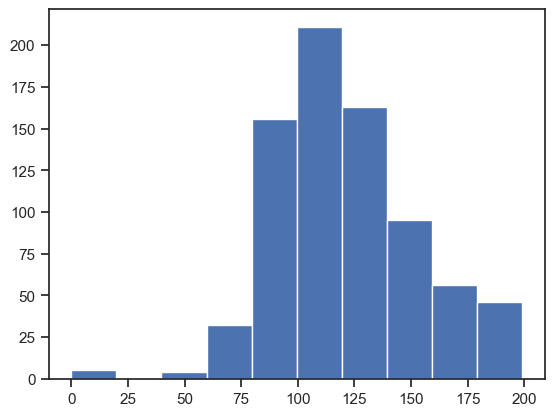

In [187]:
plt.hist(data['Glucose'])

In [188]:
data['BloodPressure'].value_counts().head()

70    57
74    52
78    45
68    45
72    44
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

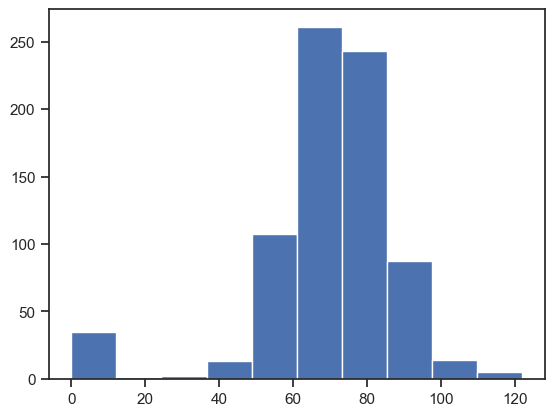

In [189]:
plt.hist(data['BloodPressure'])

In [190]:
data['SkinThickness'].value_counts().head()

0     227
32     31
30     27
27     23
23     22
Name: SkinThickness, dtype: int64

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

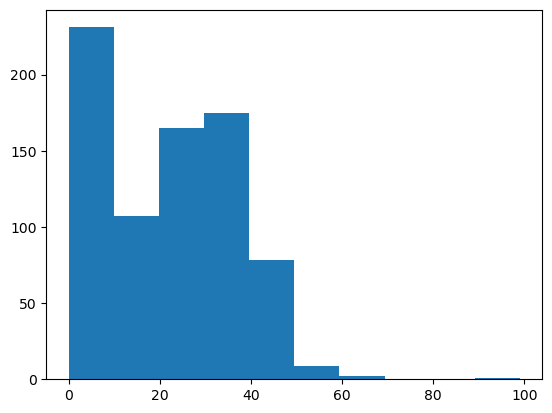

In [41]:
plt.hist(data['SkinThickness'])

In [191]:
data['Insulin'].value_counts().head()

0      374
105     11
130      9
140      9
120      8
Name: Insulin, dtype: int64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

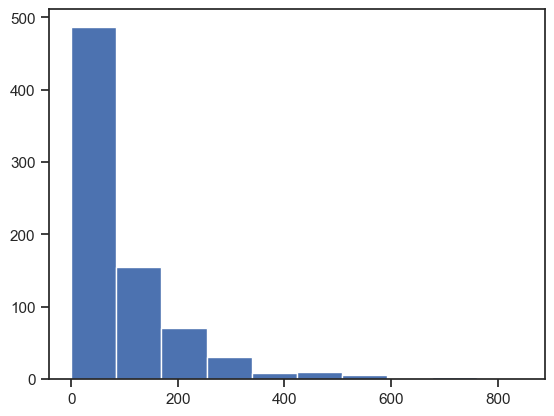

In [192]:
plt.hist(data['Insulin'])

In [193]:
 data['BMI'].value_counts().head()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

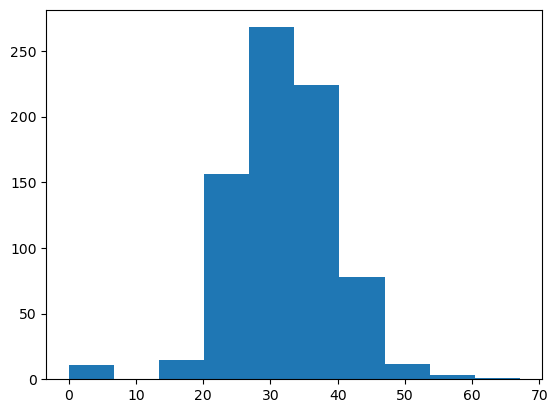

In [45]:
plt.hist(data['BMI'])

In [194]:
print('Number of missing values in Glucose :',data[data['Glucose']==0].shape[0])
print('Number of missing values in BloodPressure :',data[data['BloodPressure']==0].shape[0])
print('Number of missing values in SkinThickness :',data[data['SkinThickness']==0].shape[0])
print('Number of missing values in Insulin :',data[data['Insulin']==0].shape[0])
print('Number of missing values in BMI :',data[data['BMI']==0].shape[0])

Number of missing values in Glucose : 5
Number of missing values in BloodPressure : 35
Number of missing values in SkinThickness : 227
Number of missing values in Insulin : 374
Number of missing values in BMI : 11


### Observations :
#### After analyzing the histogram we can identify that there are some outliers in some columns.
#### For Example:-
#### BloodPressure - A living person cannot have a diastolic blood pressure of zero.
#### Plasma glucose levels - Zero is invalid number as fasting glucose level would never be as low as zero.
#### Skin Fold Thickness - For normal people, skin fold thickness can’t be less than 10 mm better yet zero.
#### BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.
#### Insulin: In a rare situation a person can have zero insulin but by observing
###### * We also found lots of 0. * **Number of missing values in (Glucose is 5), (BloodPressure is 35), (SkinThickness is 227), (Insulin is 374) & (BMI is 11).**

### Project Task: Week 2
#### Data Exploration:

##### 1.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

##### 2.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

##### 3.Perform correlation analysis. Visually explore it using a heat map.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Data balance check')]

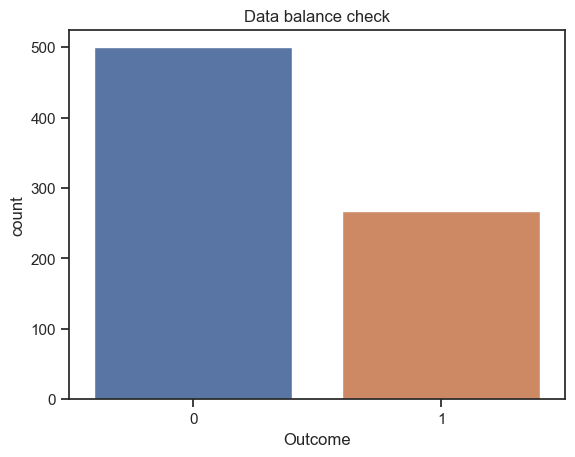

In [195]:
sns.countplot(data1.Outcome).set(title='Data balance check')

### Observation
#### We can see this is a imbalanced dataset. Where the positive outcomes are half than the neagtive

In [196]:
! pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [199]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])

In [200]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='outcome'>

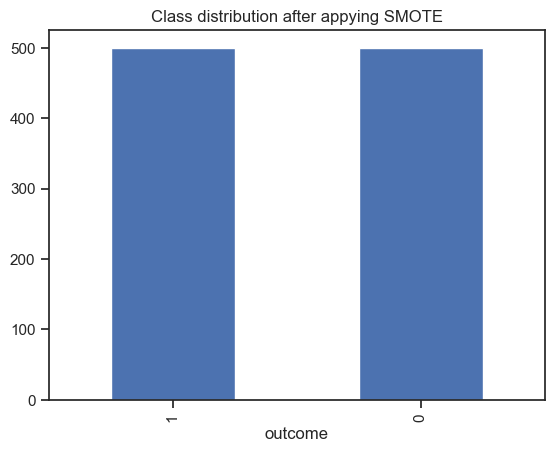

In [201]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='outcome')

In [202]:
pd.Series(y_resampled).value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [203]:
X_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.000000,72,35,0,33.600000,0.627000,50
1,1,85.000000,66,29,0,26.600000,0.351000,31
2,8,183.000000,64,0,0,23.300000,0.672000,32
3,1,89.000000,66,23,94,28.100000,0.167000,21
4,0,137.000000,40,35,168,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,6,131.796866,76,0,0,35.386476,0.545117,38
996,1,119.270418,86,40,220,45.969572,0.764463,29
997,3,125.245248,79,0,0,32.207351,0.536163,26
998,4,144.382131,82,32,0,39.049314,0.543635,36


In [204]:
y_resampled

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [205]:
X_resampled.isnull().sum().any()

False

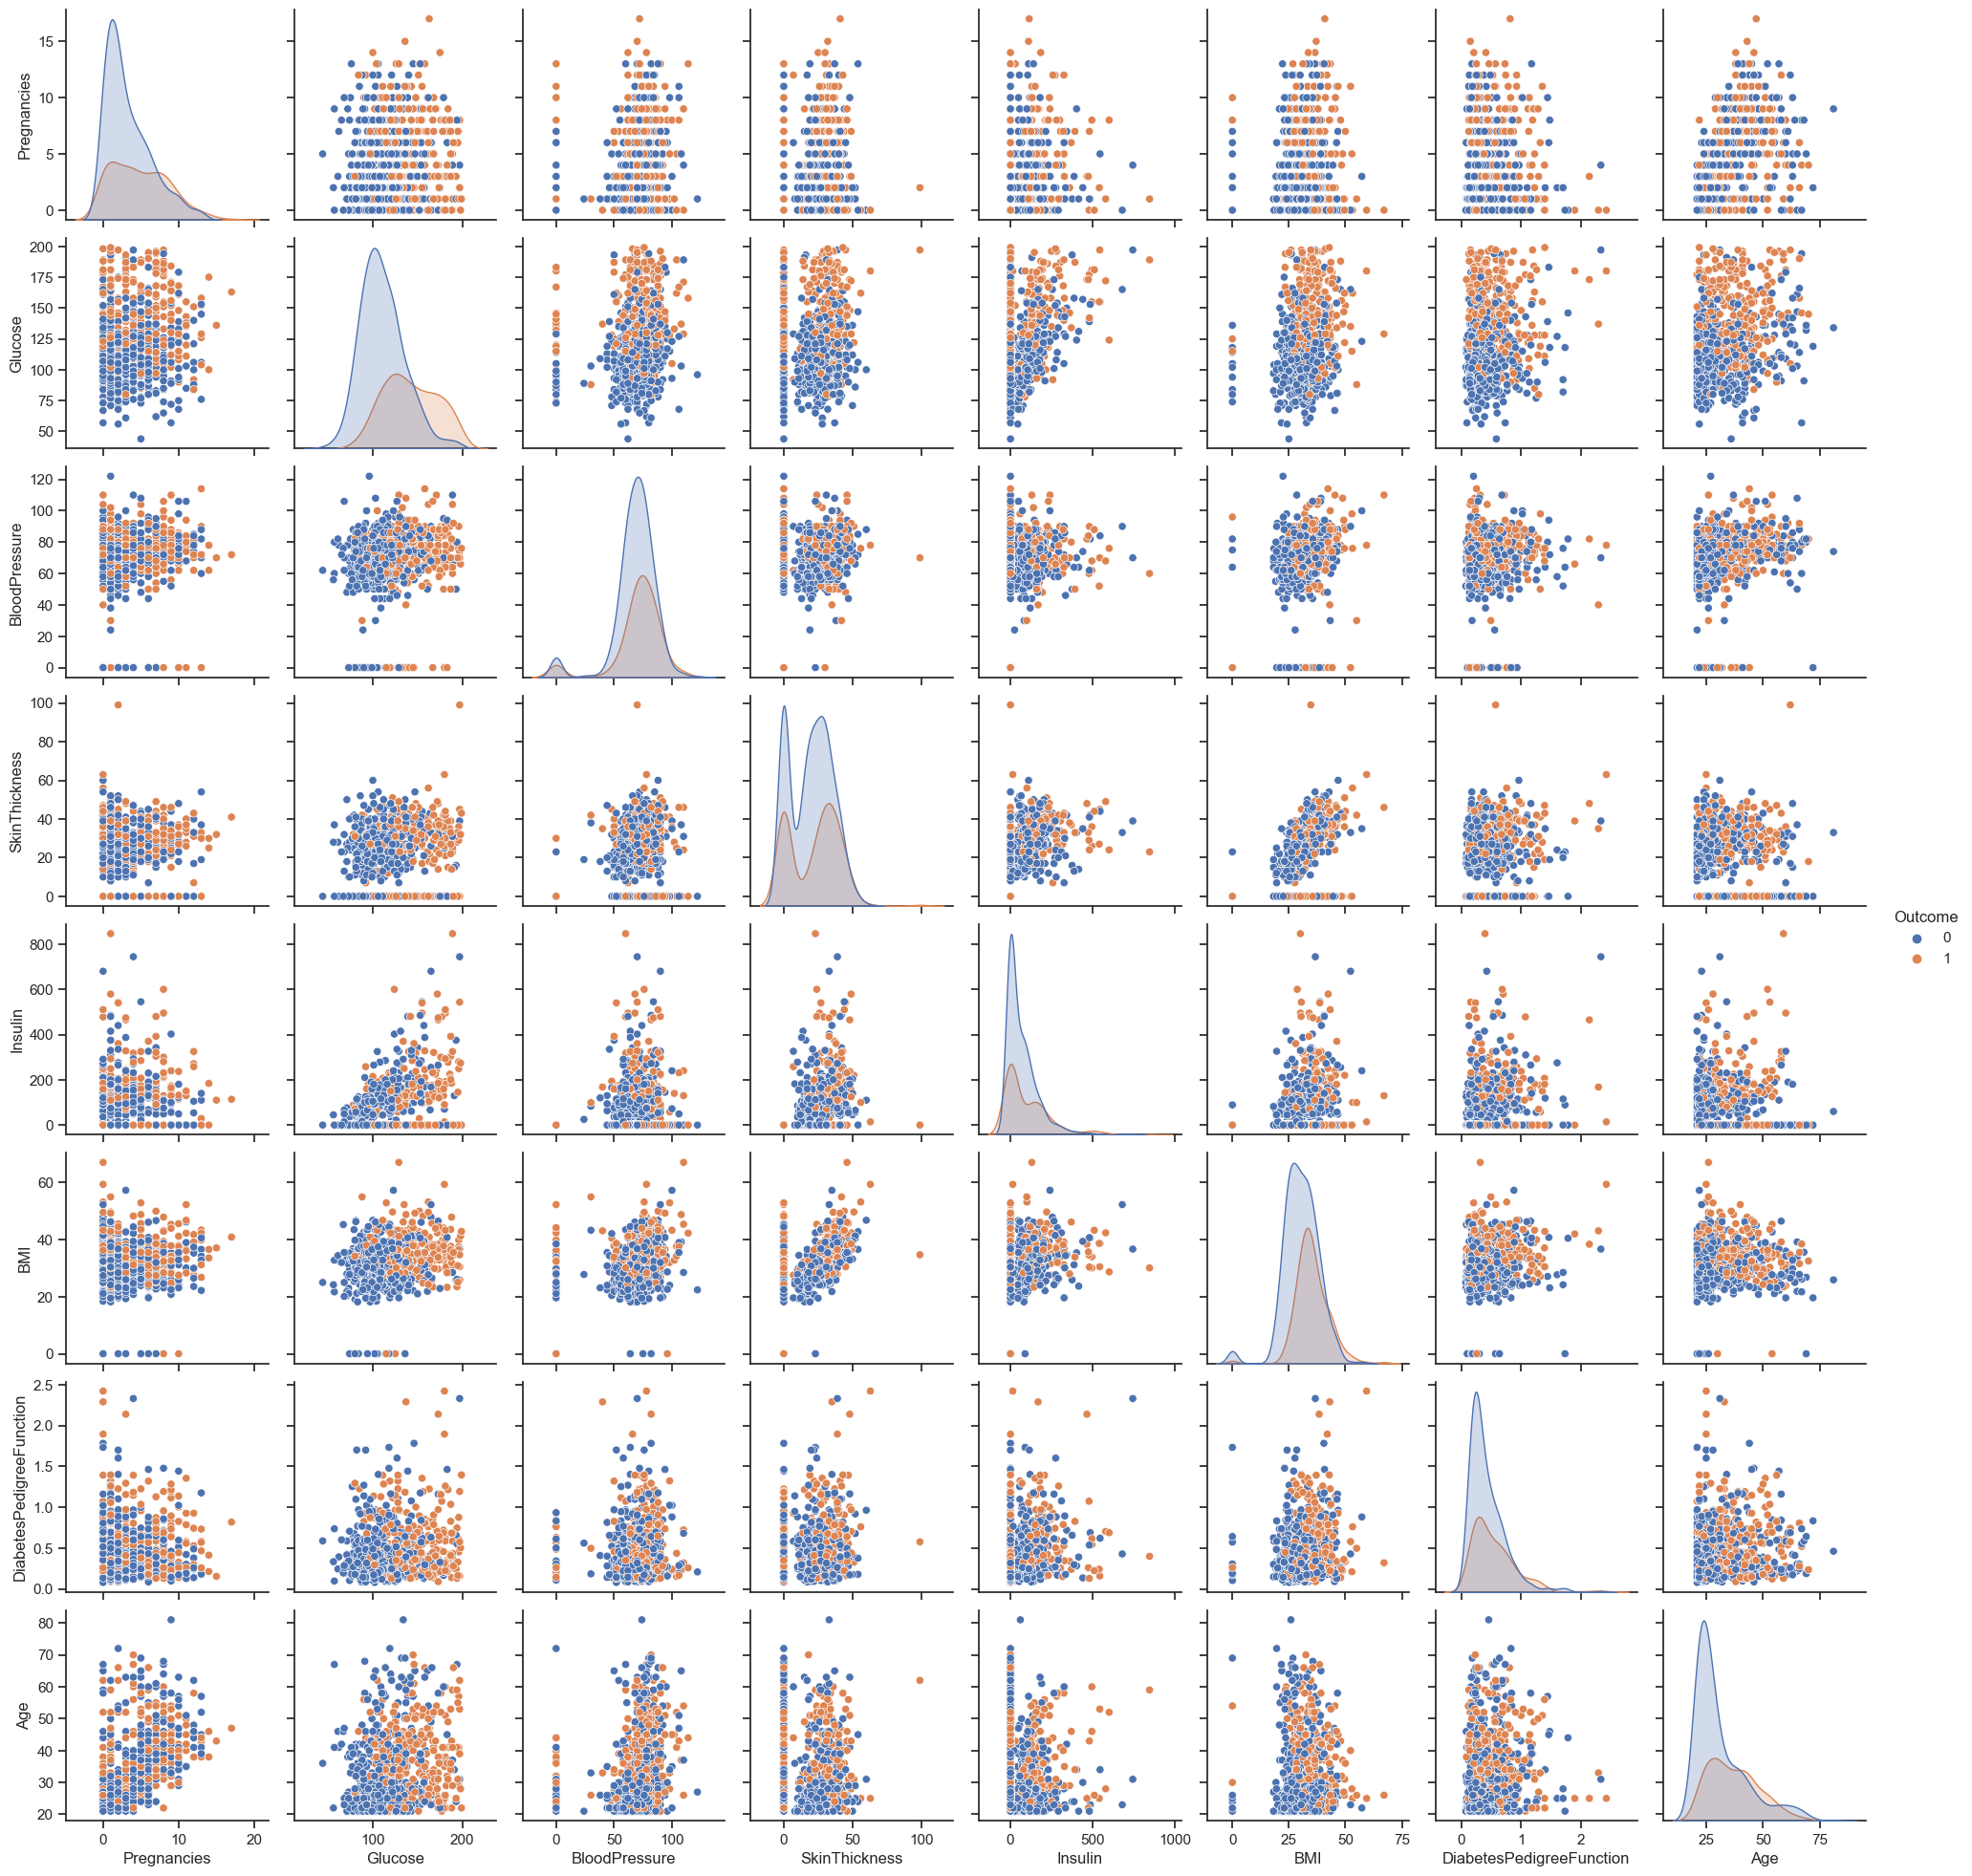

In [206]:
#Visualizing Pairplot
sns.pairplot(df,hue='Outcome')
plt.show()

In [207]:
 data1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

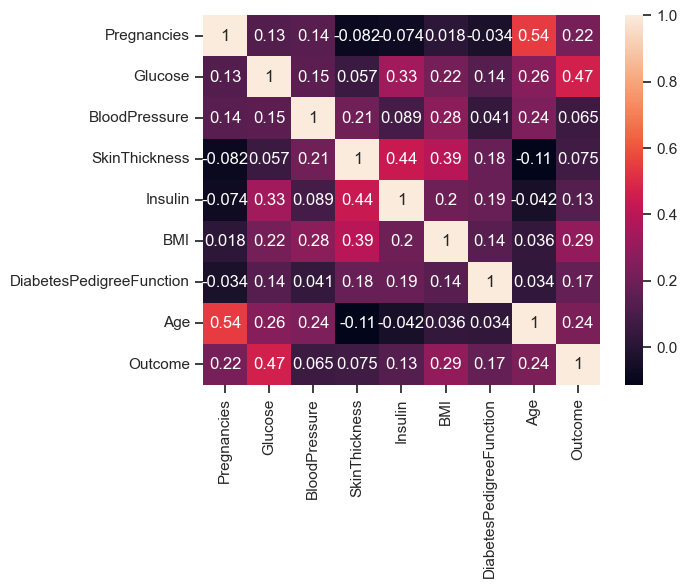

In [208]:
sns.heatmap(data1.corr(),annot=True)

### Correlation Analysis Observation:
#### 1.The BMI-Skinthickness and Insulin-Glucose are the highest correlated in the set but they are moderately correlated
#### 2.Outcome is moderately correlated to Glucose
#### 3.Age is moderately correlated to pregnancies

### Project Task: Week 3
#### Data Modeling:

##### 1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

##### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [210]:
# define the features and outcome
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [211]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [212]:
#Logistic Regression

In [213]:
# initialize the models
logreg = LogisticRegression()

# fit the models to the training data
logreg.fit(X_train, y_train)

# make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# calculate the accuracy of the models
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# print the accuracy of the models
print("Logistic Regression accuracy :}",acc_logreg)

Logistic Regression accuracy :} 0.7291666666666666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
logreg.score(X_test,y_test)

0.7291666666666666

In [215]:
from sklearn.svm import SVC

In [216]:
# initialize the models
svm = SVC()

# fit the models to the training data
svm.fit(X_train, y_train)

# make predictions on the test set
y_pred_svm = svm.predict(X_test)

# calculate the accuracy of the models
acc_svm = accuracy_score(y_test, y_pred_svm)

# print the accuracy of the models
print("SVM accuracy :",acc_svm)

SVM accuracy : 0.7291666666666666


In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
# initialize the models
dt = DecisionTreeClassifier()

# fit the models to the training data
dt.fit(X_train, y_train)

# make predictions on the test set
y_pred_dt = dt.predict(X_test)

# calculate the accuracy of the models
acc_dt = accuracy_score(y_test, y_pred_dt)

# print the accuracy of the models
print("Decision Tree accuracy :",acc_dt)

Decision Tree accuracy : 0.6770833333333334


In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
# initialize the models
rf = RandomForestClassifier()

# fit the models to the training data
rf.fit(X_train, y_train)

# make predictions on the test set
y_pred_rf = rf.predict(X_test)

# calculate the accuracy of the models
acc_rf = accuracy_score(y_test, y_pred_rf)

# print the accuracy of the models
print("Random Forest accuracy :",acc_rf)

Random Forest accuracy : 0.734375


In [160]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# fit the classifier to the training data
knn.fit(X_train, y_train)

# predict on the test set
y_pred = knn.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("KNeighborsClassifier accuracy:", accuracy)

KNeighborsClassifier accuracy: 0.65625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [221]:
data.to_csv('health.csv')

### Project Task: Week 4
#### Data Modeling:
#### 1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [222]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [223]:
# Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for LogisticRegression

In [224]:
# generate the classification report
report = classification_report(y_test, y_pred_logreg)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



AUC: 0.712
True Positive Rate: [0.         0.65217391 1.        ] 
False Positive Rate: [0.         0.22764228 1.        ] 
Thresholds: [2 1 0]


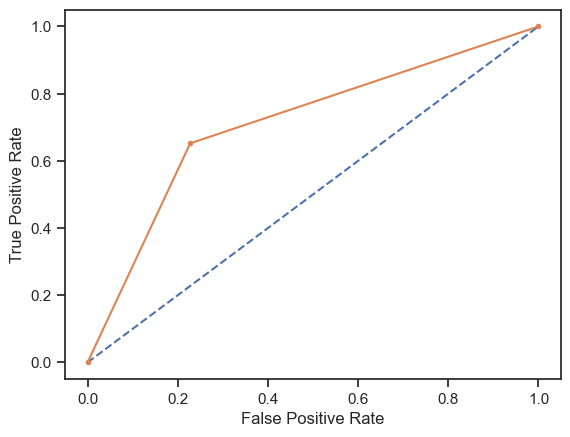

In [225]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_logreg)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [226]:
# Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for SVC

In [227]:
# generate the classification report
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       123
           1       0.67      0.49      0.57        69

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.72      0.73      0.72       192



AUC: 0.677
True Positive Rate: [0.         0.49275362 1.        ] 
False Positive Rate: [0.         0.13821138 1.        ] 
Thresholds: [2 1 0]


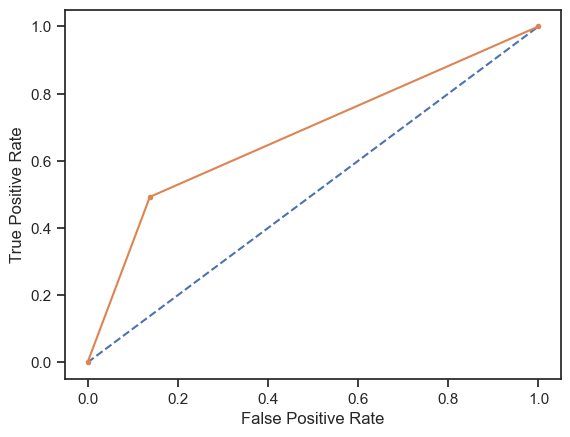

In [228]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_svm)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [229]:
# Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for Decision Tree

In [230]:
# generate the classification report
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       123
           1       0.54      0.62      0.58        69

    accuracy                           0.68       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.69      0.68      0.68       192



AUC: 0.665
True Positive Rate: [0.         0.62318841 1.        ] 
False Positive Rate: [0.         0.29268293 1.        ] 
Thresholds: [2 1 0]


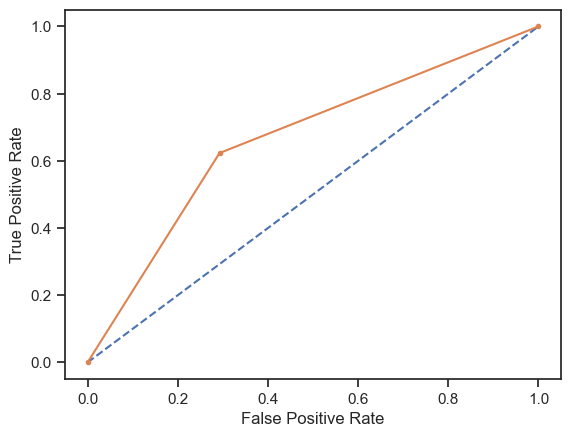

In [231]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [232]:
# Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for Random Forest Classifier

In [233]:
# generate the classification report
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192



AUC: 0.713
True Positive Rate: [0.         0.63768116 1.        ] 
False Positive Rate: [0.         0.21138211 1.        ] 
Thresholds: [2 1 0]


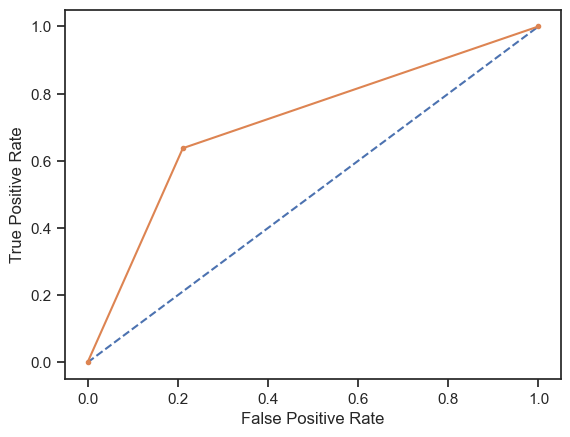

In [234]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [235]:
# Classification report by analyzing sensitivity, specificity, AUC (ROC curve) for KNeighborsClassifier

In [236]:
# generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.52      0.55      0.54        69

    accuracy                           0.66       192
   macro avg       0.63      0.63      0.63       192
weighted avg       0.66      0.66      0.66       192



AUC: 0.633
True Positive Rate: [0.         0.65217391 1.        ] 
False Positive Rate: [0.         0.22764228 1.        ] 
Thresholds: [2 1 0]


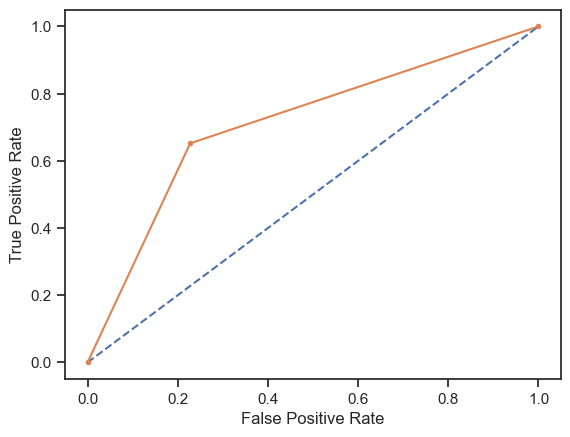

In [237]:
# calculate AUC curve
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
print("True Positive Rate:",tpr,"\nFalse Positive Rate:",fpr,"\nThresholds:",thresholds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()